In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
train_dir = "mnist-jpg/train"
test_dir  = "mnist-jpg/test"

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)


Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [3]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

Epoch 1/10


2025-11-07 07:33:32.177181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2025-11-07 07:33:32.208393: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


937/938 [============================>.] - ETA: 0s - loss: 0.3696 - accuracy: 0.8923

2025-11-07 07:33:42.693011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


938/938 [==============================] - 12s 13ms/step - loss: 0.3693 - accuracy: 0.8924 - val_loss: 0.1980 - val_accuracy: 0.9409
Epoch 2/10
938/938 [==============================] - 11s 12ms/step - loss: 0.1591 - accuracy: 0.9526 - val_loss: 0.1292 - val_accuracy: 0.9623
Epoch 3/10
938/938 [==============================] - 11s 12ms/step - loss: 0.1132 - accuracy: 0.9661 - val_loss: 0.1116 - val_accuracy: 0.9652
Epoch 4/10
938/938 [==============================] - 11s 12ms/step - loss: 0.0890 - accuracy: 0.9734 - val_loss: 0.0994 - val_accuracy: 0.9690
Epoch 5/10
938/938 [==============================] - 11s 11ms/step - loss: 0.0732 - accuracy: 0.9782 - val_loss: 0.0932 - val_accuracy: 0.9707
Epoch 6/10
938/938 [==============================] - 11s 11ms/step - loss: 0.0611 - accuracy: 0.9818 - val_loss: 0.0852 - val_accuracy: 0.9732
Epoch 7/10
938/938 [==============================] - 11s 12ms/step - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.0849 - val_accuracy: 0.9744
Epo

In [5]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.3f}")
print(f"Test Loss: {test_loss:.3f}")

 38/157 [======>.......................] - ETA: 0s - loss: 0.0615 - accuracy: 0.9819

2025-11-07 07:35:22.879691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


157/157 [==============================] - 1s 4ms/step - loss: 0.0785 - accuracy: 0.9773
Test Accuracy: 0.977
Test Loss: 0.079


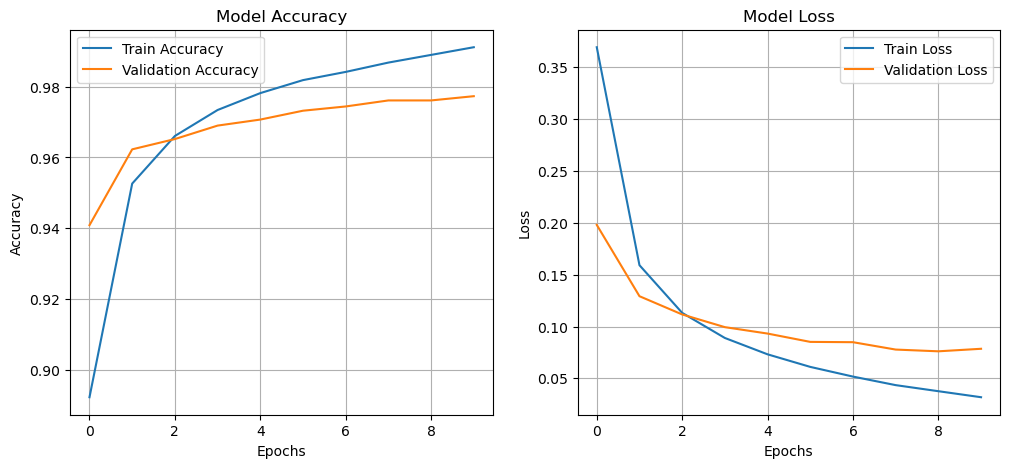

In [6]:
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


In [10]:
image_path = os.path.join(test_dir, '0', '10.jpg')  

# Load the image and preprocess
img = load_img(image_path, target_size=(28, 28), color_mode='grayscale')
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # normalize

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)[0]

# Get class labels from directory
class_labels = list(train_generator.class_indices.keys())

print(f"\nPredicted Class: {class_labels[predicted_class]}")
print(f"Prediction Probabilities:\n{pred}")

1/1 [==============================] - 0s 14ms/step

Predicted Class: 0
Prediction Probabilities:
[[9.99997497e-01 4.41175655e-12 6.13311215e-07 1.55079324e-10
  8.26299654e-11 1.12222426e-10 5.66328495e-08 2.45361171e-08
  7.82678089e-12 1.76708511e-06]]


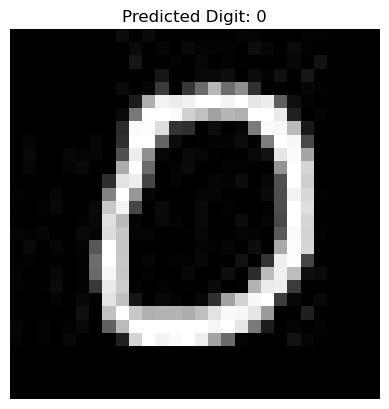

In [8]:
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Digit: {class_labels[predicted_class]}")
plt.axis('off')
plt.show()
